**INTRODUÇÃO**

------
**POS Tagging:**
Na linguística de corpus, marcação de parte da fala (POS Tagging), também chamado marcação gramatical é o processo de marcar uma palavra em um texto (corpus) como correspondente a um determinado parte do discurso, baseado tanto na sua definição como na sua contexto. Uma forma simplificada disso é comumente ensinada a crianças em idade escolar, na identificação de palavras como substantivos, verbos, adjetivos, advérbios, etc. ([Wikipedia](https://en.wikipedia.org/wiki/Part-of-speech_tagging))

Este trabalho visa estudar a tarefa de POS Tagging para a língua portuguesa.
Dito isso utilizaremos o corpus Mac-Morpho, produzido pelo grupo NILC da ICMC USP. O Mac-Morpho oferece dados para treinamento, validação e teste de modelos preditivos, capazes de classificar a classe gramatical de palavras em Português.

**PREPARAÇÃO DO AMBIENTE**


In [1]:
import numpy as np
import nltk

**DOWNLOAD E PREPARAÇÃO CORPUS**

Mac-Morpho é um corpus de textos em Português do Brasil anotados com tags de parte da fala. Sua primeira versão foi lançada em 2003, e desde então, duas revisões foram feitas a fim de melhorar a qualidade do recurso. O corpus possui milhões de palavras retiradas do jornal Folha de São Paulo (1994)
Dito isso, o pacote Natural Language Toolkit (NLTK), possui um módulo com o corpus MacMorpho para download e tratamento

In [2]:
nltk.download("mac_morpho")

[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.


True

**ESPECIFICAÇÃO DO POS TAGGING DO CORPUS**

Conforme documento disponível em http://nilc.icmc.usp.br/macmorpho/macmorpho-manual.pdf, as palavras estão dispostas da seguinte forma: palavra_CLASSE, onde as classes estão abreviadas conforme tabela abaixo.

-----

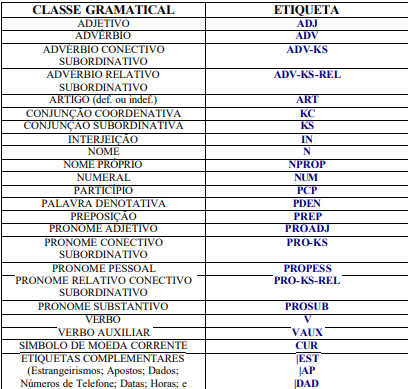


In [3]:
nltk.download("universal_tagset")
nltk_data = list(nltk.corpus.mac_morpho.tagged_sents())
print(nltk_data[:2])

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('Cr$', 'CUR'), ('1,4', 'NUM'), ('milhão', 'N'), ('em', 'PREP|+'), ('a', 'ART'), ('venda', 'N'), ('de', 'PREP|+'), ('a', 'ART'), ('Pinhal', 'NPROP'), ('em', 'PREP'), ('São', 'NPROP'), ('Paulo', 'NPROP')], [('Programe', 'V'), ('sua', 'PROADJ'), ('viagem', 'N'), ('a', 'PREP|+'), ('a', 'ART'), ('Exposição', 'NPROP'), ('Nacional', 'NPROP'), ('do', 'NPROP'), ('Zebu', 'NPROP'), (',', ','), ('que', 'PRO-KS-REL'), ('começa', 'V'), ('dia', 'N'), ('25', 'N|AP')]]


**PREPROCESSANDO CORPUS**

No objetivo de simplificar a análise, estamos considerando apenas as classes de palavras primárias, visto que se trata de um corpus complexo com tipos compostos. Além disso, separamos os dados de treino e teste, de maneira que os dados de teste ficaram sendo as últimas 100 sentenças do corpus e os demais ficaram para treino.

In [4]:
#from sklearn.model_selection import train_test_split

def simplify_tag(tag):
  return tag if "+" not in tag else tag[tag.index("+")+1:]

tagged_sents = nltk.corpus.mac_morpho.tagged_sents()
tagged_sents = [[(w.lower(), simplify_tag(t)) for (w,t) in sent] for sent in tagged_sents if sent]

train_data = tagged_sents[100:]
test_data = tagged_sents[:100]


**TREINANDO MODELOS DE UNIGRAM E BIGRAM PARA POS TAGGER**

Aqui, estamos treinando dois modelos de tagger (Unigram e Bigram), cuja definição será apresentada abaixo:



*   Como o nome indica, o **Unigram Tagger** é um tagger que usa apenas uma única palavra como seu contexto para determinar a tag POS(Part-of-Speech). Em palavras simples, Unigram Tagger é um tagger baseado em contexto cujo contexto é uma única palavra, ou seja, Unigram.
*   Um n-gram é uma subsequência de n itens, portanto, como o nome indica, **Bigram Tagger** subclasse olha para os dois itens. O primeiro item é a palavra com tag anterior e o segundo item é a palavra com tag atual.



In [5]:
tagger_unigram = nltk.UnigramTagger(train_data, backoff=nltk.DefaultTagger('N'))
tagger_bigram = nltk.BigramTagger(train_data, backoff=tagger_unigram)


**ANALISANDO RESULTADOS**

Aqui, é feita a análise dos resultados para os dois taggers testados, e as medidas de acurácia são inicialmente comparadas. Feito isso, pegamos o modelo com melhor acurácia e plotamos sua **Matriz de Confusão**, bem como uma tabela analisando as métricas de **Precisão, Recall e F1-Score por tag**.

Lembrando que, para calcular tais métricas, utilizamos a matriz de confusão da seguinte forma:

------
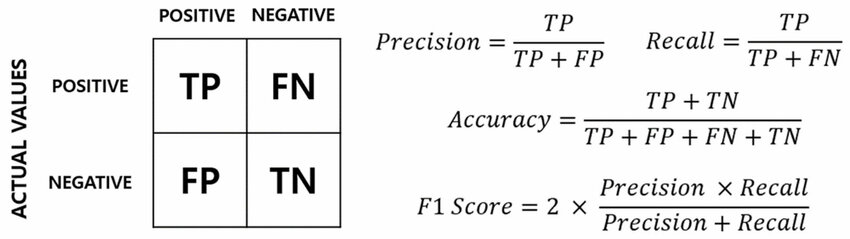

In [6]:
print("Unigram Tagger Accuracy => {}".format(round(tagger_unigram.accuracy(test_data), 3)))
print("Bigram Tagger Accuracy => {}".format(round(tagger_bigram.accuracy(test_data), 3)))

print(tagger_bigram.confusion(test_data))


Unigram Tagger Accuracy => 0.849
Bigram Tagger Accuracy => 0.859
           |                                           A                                                       P                     |
           |                                           D                                                       R                     |
           |                                           V                                                       O                     |
           |                                           -                                                       -       P             |
           |                                           K                                                   P   K   P   R   P         |
           |                                           S                       N           N               R   S   R   O   R         |
           |                                           -                       P       N   |       P   P   O   -   O   P   O 

In [7]:
#Printing metrics results (recall, precision, F-1) per class (tag)
print(tagger_bigram.evaluate_per_tag(test_data))

       Tag | Prec.  | Recall | F-measure
-----------+--------+--------+-----------
           | 0.5203 | 0.4051 | 0.4555
         " | 1.0000 | 1.0000 | 1.0000
         $ | 1.0000 | 1.0000 | 1.0000
         ( | 1.0000 | 1.0000 | 1.0000
         ) | 1.0000 | 1.0000 | 1.0000
         , | 1.0000 | 1.0000 | 1.0000
         - | 1.0000 | 1.0000 | 1.0000
         : | 1.0000 | 1.0000 | 1.0000
       ADJ | 0.8722 | 0.9355 | 0.9027
       ADV | 0.8667 | 1.0000 | 0.9286
ADV-KS-REL | 1.0000 | 1.0000 | 1.0000
       ART | 0.9741 | 0.9647 | 0.9694
       CUR | 1.0000 | 1.0000 | 1.0000
        KC | 0.9483 | 1.0000 | 0.9735
        KS | 0.6364 | 0.7368 | 0.6829
         N | 0.8690 | 0.9715 | 0.9174
     NPROP | 0.9618 | 0.6864 | 0.8011
       NUM | 0.9815 | 0.7794 | 0.8689
      N|AP | 0.8000 | 0.4444 | 0.5714
     N|TEL | 0.0000 | 0.0000 | 0.0000
       PCP | 0.9512 | 0.9070 | 0.9286
      PDEN | 1.0000 | 1.0000 | 1.0000
      PREP | 0.6031 | 0.7524 | 0.6695
    PRO-KS | 1.0000 | 1.0000 | 1.0000
PRO-K

**TESTANDO UMA FRASE DESPRETENSIOSA..**

Aqui, é possível ver nosso tagger em funcionamento, classificando corretamente todas as palavras na sentença "NLP é uma disciplina muito interessante"

In [9]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
print(tagger_bigram.tag(word_tokenize("NLP é uma disciplina muito interessante")))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('NLP', 'N'), ('é', 'V'), ('uma', 'ART'), ('disciplina', 'N'), ('muito', 'ADV'), ('interessante', 'ADJ')]
